In [ ]:
# Python 3.9.16

In [1]:
label2id = {
    "book":0,
    "drink":1,
    "computer":2,
    "before":3,
    "go":4,
    "who":5,
    "candy": 6,
    "cousin":7,
    "deaf": 8,
    "fine": 9,
    "help":10,
    "no":11,
    "thin":12,
    "walk":13,
}
id2label = {i: label for label, i in label2id.items()}
class_labels = list(label2id.keys())

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [3]:
#!pip install pytorchvideo

In [4]:
#!pip install pytorchvideo transformers evaluate -q

In [5]:
#pip install numpy --upgrade

In [6]:
import pytorchvideo.data

In [7]:
import json

with open("WLASL_v0.3.json") as f:
    data = json.loads(f.read())
    
def get_video_ids(word):
    results = []
    for i in data:
        if(i['gloss'] == word):
            for j in i['instances']:
                results.append(j['video_id'])
    return results

In [10]:
# RUN TO CREATE DATASET
# import os
# import math
# test_size = 0.2
# val_size = 0.2
# train_size = 0.6
# import shutil

# from moviepy.editor import *

# for word in class_labels:
#     ids_for_word = get_video_ids(word)
#     print(word)
#     result = []
#     for idd in ids_for_word:  
#         if(os.path.isfile(f"videos/{idd}.mp4")):
#             result.append(f"videos/{idd}.mp4") 
#     final_test_size = math.floor(test_size*len(result)) 
#     final_val_size = math.floor(val_size*len(result))
#     final_train_size = len(result) - final_test_size - final_val_size
#     count = 0
#     for file_path in result:
#         os.makedirs(f'transformers/train/{word}', exist_ok=True)
#         os.makedirs(f'transformers/test/{word}', exist_ok=True)
#         os.makedirs(f'transformers/val/{word}', exist_ok=True)
#         try:
#             clip = VideoFileClip(file_path)
#             clip = clip.resize( newsize=(224,224) )
#             #clip.write_videofile("gfg_intro.webm")
#             #clip = clip.crop(min_width, min_height)
#             #duration = clip.duration
#             if(count < final_train_size):
#                 clip.write_videofile(f'transformers/train/{word}/{count}'+'.mp4')
#                 #shutil.copy(file_path, f'transformers/train/{word}/{count}.mp4')
#             elif(count < final_train_size+final_val_size):
#                 clip.write_videofile(f'transformers/val/{word}/{count}'+'.mp4')
#             else:
#                 clip.write_videofile(f'transformers/test/{word}/{count}'+'.mp4')
#                 #shutil.copy(file_path, f'transformers/test/{word}/{count}.mp4')
#         except:
#             print(file_path)
#             continue
#         count+=1

In [11]:
import pathlib

dataset_root_path = "transformers"
dataset_root_path = pathlib.Path(dataset_root_path)

In [12]:
video_count_train = len(list(dataset_root_path.glob("train/*/*.mp4")))
video_count_val = len(list(dataset_root_path.glob("val/*/*.mp4")))
video_count_test = len(list(dataset_root_path.glob("test/*/*.mp4")))
video_total = video_count_train + video_count_val + video_count_test
print(f"Total videos: {video_total}")

Total videos: 152


In [13]:
all_video_file_paths = (
    list(dataset_root_path.glob("train/*/*.mp4"))
    + list(dataset_root_path.glob("val/*/*.mp4"))
    + list(dataset_root_path.glob("test/*/*.mp4"))
)
all_video_file_paths[:5]

[WindowsPath('transformers/train/before/0.mp4'),
 WindowsPath('transformers/train/before/1.mp4'),
 WindowsPath('transformers/train/before/2.mp4'),
 WindowsPath('transformers/train/before/3.mp4'),
 WindowsPath('transformers/train/before/4.mp4')]

In [14]:
#!pip install transformers

In [15]:
from transformers import VideoMAEFeatureExtractor, VideoMAEForVideoClassification


model_ckpt = "MCG-NJU/videomae-base"
feature_extractor = VideoMAEFeatureExtractor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,  # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

C:\Users\nerfl\anaconda3\envs\test_env\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nerfl\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\nerfl\anaconda3\envs\test_env\lib\site-packages\transformers\models\videomae\feature_extraction_videomae.py:28: FutureWarning:

Some weights of the model checkpoint at MCG-NJU/videomae-large were not used when initializing VideoMAEForVideoClassification: ['decoder.decoder_layers.11.intermediate.dense.weight', 'decoder.decoder_layers.10.attention.attention.key.weight', 'decoder.decoder_layers.9.attention.output.dense.bias', 'decoder.decoder_layers.2.intermediate.dense.bias', 'decoder.decoder_layers.3.output.dense.weight', 'decoder.decoder_layers.9.output.dense.weight', 'decoder.decoder_layers.5.output.dense.bias', 'decoder.decoder_layers.5.attention.output.dense.weight', 'decoder.decoder_layers.10.intermediate.dense.bias', 'decoder.decoder_layers.1.attention.output.dense.weight', 'decoder.decoder_layers.7.layernorm_before.bias', 'decoder.decoder_layers.11.attention.attention.q_bias', 'decoder.decoder_layers.5.attention.attention.q_bias', 'decoder.decoder_layers.0.layernorm_after.bias', 'decoder.decoder_layers.6.attention.attention.value.weight', 'decoder.decoder_layers.4.attention.attention.key.weight', 'decoder

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)
from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
    RandomResizedCrop,
    RandAugment,
    AugMix
)

In [17]:
mean = feature_extractor.image_mean
std = feature_extractor.image_std
resize_to = feature_extractor.size

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 24
clip_duration = num_frames_to_sample * sample_rate / fps

In [18]:
import os
# Training dataset transformations.
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=224, max_size=224),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)


# Training dataset.
train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform
)

In [19]:
import torchvision.transforms as T
# Validation and evaluation datasets' transformations.
# TODO -> Add more augmentation
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std)
                ]
            ),
        ),
    ]
)
val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "val"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [20]:
# We can access the `num_videos` argument to know the number of videos we have in the
# dataset.
train_dataset.num_videos, val_dataset.num_videos, test_dataset.num_videos

(94, 30, 28)

In [21]:
next(train_dataset)

{'video': tensor([[[[-0.7650, -0.6623, -0.5424,  ..., -0.6794, -0.5938, -0.5767],
           [-0.7308, -0.6623, -0.5596,  ..., -0.6965, -0.6109, -0.5938],
           [-0.7308, -0.6623, -0.5938,  ..., -0.7137, -0.6281, -0.6109],
           ...,
           [-1.4500, -1.4500, -1.4500,  ..., -1.3130, -1.3302, -1.3302],
           [-1.4500, -1.4500, -1.4500,  ..., -1.3302, -1.3302, -1.3473],
           [-1.4843, -1.4843, -1.4843,  ..., -1.3302, -1.3473, -1.3473]],
 
          [[-0.7650, -0.6623, -0.5424,  ..., -0.7308, -0.6623, -0.6281],
           [-0.7479, -0.6623, -0.5596,  ..., -0.7308, -0.6452, -0.6281],
           [-0.7308, -0.6623, -0.5938,  ..., -0.7479, -0.6623, -0.6281],
           ...,
           [-1.4500, -1.4500, -1.4500,  ..., -1.3302, -1.3302, -1.3473],
           [-1.4500, -1.4500, -1.4500,  ..., -1.3302, -1.3473, -1.3473],
           [-1.4843, -1.4843, -1.4843,  ..., -1.3302, -1.3644, -1.3644]],
 
          [[-0.7650, -0.6623, -0.5424,  ..., -0.7650, -0.7137, -0.6452],
    

In [22]:
# Let's now take a preprocessed video from the dataset and investigate it.

sample_video = next(iter(train_dataset))
sample_video.keys()

dict_keys(['video', 'video_name', 'video_index', 'clip_index', 'aug_index', 'label'])

In [23]:
import imageio
import numpy as np
from IPython.display import Image


def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)


def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.
    
    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename


def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

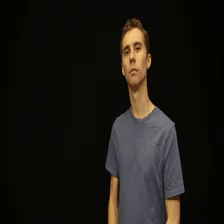

In [24]:
video_tensor = sample_video["video"]
display_gif(video_tensor)

### Training the model

In [25]:
# from huggingface_hub import notebook_login

# notebook_login()

In [26]:
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [37]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-sign-subset"
num_epochs = 2
batch_size = 2
# TODO -> Find best hyperparameters

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    #fp16=True,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // batch_size) * num_epochs,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [28]:
#pip install evaluate

In [29]:
import evaluate

metric = evaluate.load("accuracy")

In [30]:
# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions."""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [31]:
import torch
# We also define a collate_fn, which will be used to batch examples together. Each batch consists of 2 keys, namely pixel_values and labels.


def collate_fn(examples):
    """The collation function to be used by `Trainer` to prepare data batches."""
    # permute to (num_frames, num_channels, height, width)
    #print([example["video"] for example in examples])
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [32]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset = val_dataset,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

Cloning https://huggingface.co/NerfLongshot/videomae-large-finetuned-sign-subset into local empty directory.
max_steps is given, it will override any value given in num_train_epochs


In [38]:
train_results = trainer.train()

***** Running training *****
  Num examples = 752
  Num Epochs = 9223372036854775807
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 4
  Total optimization steps = 94
  Number of trainable parameters = 303875086


OutOfMemoryError: CUDA out of memory. Tried to allocate 302.00 MiB (GPU 0; 4.00 GiB total capacity; 2.98 GiB already allocated; 0 bytes free; 3.33 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
trainer.evaluate(test_dataset)

In [39]:
# Run to clear gpu memory
import gc
torch.cuda.empty_cache()
gc.collect()

3035